<a href="https://colab.research.google.com/github/Gonzales-James/DSP/blob/main/Lab04%20-%20Image%20Manipulation/58044_Lab04_Henerawr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# Dowloading Sample Images from Drive
!gdown https://drive.google.com/uc?id=1lGh-zSR-CDUdaisgK-vMd2vpIVJUXsgC
!gdown https://drive.google.com/uc?id=1u0IeeEPwm9xAxOVH-9Pb0hbySpIG62Ku
!gdown https://drive.google.com/uc?id=1hapPn21ZZJ54GmI129hY1__AbCQSEKyA

Downloading...
From: https://drive.google.com/uc?id=1lGh-zSR-CDUdaisgK-vMd2vpIVJUXsgC
To: /content/sasuke.jpg
100% 18.7k/18.7k [00:00<00:00, 21.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1u0IeeEPwm9xAxOVH-9Pb0hbySpIG62Ku
To: /content/luffy.jpg
100% 14.3k/14.3k [00:00<00:00, 18.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hapPn21ZZJ54GmI129hY1__AbCQSEKyA
To: /content/bike.jpg
100% 188k/188k [00:00<00:00, 70.5MB/s]


In [3]:
## Importing Sample Images
image1 = cv2.imread('sasuke.jpg') 
image2 = cv2.imread('luffy.jpg')
image3 = cv2.imread('bike.jpg')

gray1 = cv2.imread('sasuke.jpg', 0)
gray2 = cv2.imread('luffy.jpg', 0)
gray3 = cv2.imread('bike.jpg', 0)

In [4]:
# Function for displaying images (image, figure title, if axis is on or off)
def display_image(image, title='', axis="on"):
  plt.figure(figsize=(20,16)) 
  plt.subplot(141)
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.axis(axis)

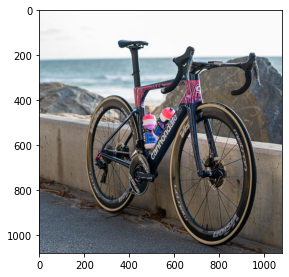

In [5]:
# Displaying Sample Image
display_image(image3)

# Resizing an Image

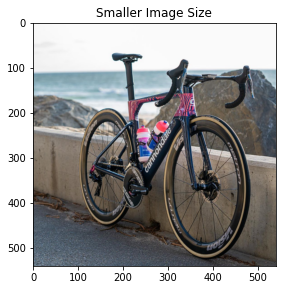

In [6]:
small = cv2.resize(image3, (0,0), fx=0.5, fy=0.5) # fx and fy are the scale factor along horizontal and vertical axis
large = cv2.resize(image3, (0,0), fx=1.5, fy=1.5)

display_image(small, "Smaller Image Size")

# Cropping an Image

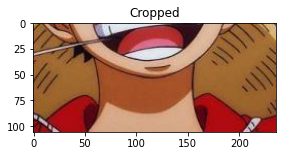

In [7]:
crop_img = image2[150:400, 20:350] # Crop from {x, y, w, h }

display_image(crop_img, "Cropped")

# RGB Channel Splitting

<Figure size 1440x1152 with 0 Axes>

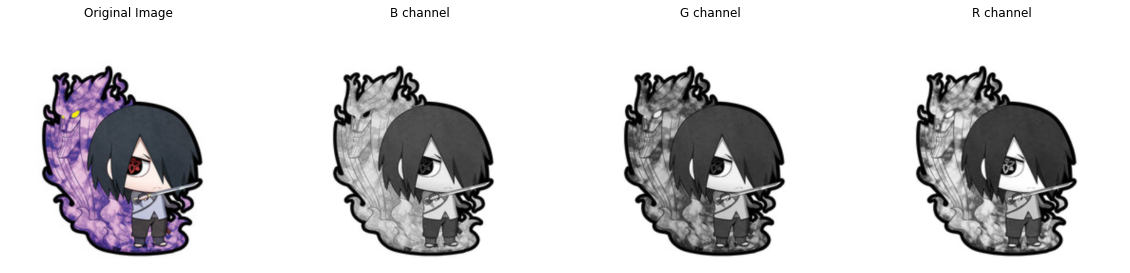

In [31]:
b,g,r = cv2.split(image1) # this splits the image into the three channels (r,g,b)

plt.figure(figsize=(20,16))
display_image(image1, "Original Image", "off") # displaying the orginal image

# displaying each channel, gray colormap was used for easier observation of differences
# you can also use other colormaps
plt.subplot(142)
plt.title("B channel")
plt.imshow(b, cmap='gray')
plt.axis("off")

plt.subplot(143)
plt.title("G channel")
plt.imshow(g, cmap='gray')
plt.axis("off")

plt.subplot(144)
plt.title("R channel")
plt.imshow(r, cmap='gray')
plt.axis("off")

plt.show()

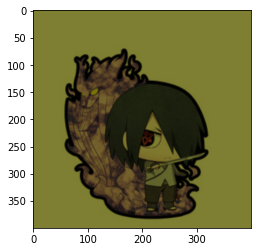

In [35]:
# merging the channels
img_merge1 = cv2.merge([r,g,b]) # this will result in orignal color of the image
img_merge2 = cv2.merge([r//2,g//2,b//5]) # you can also perform operations to manipulate the outcome
plt.imshow(img_merge2)
plt.show()

# Hue, Saturation, and Value Channels

<Figure size 1440x1152 with 0 Axes>

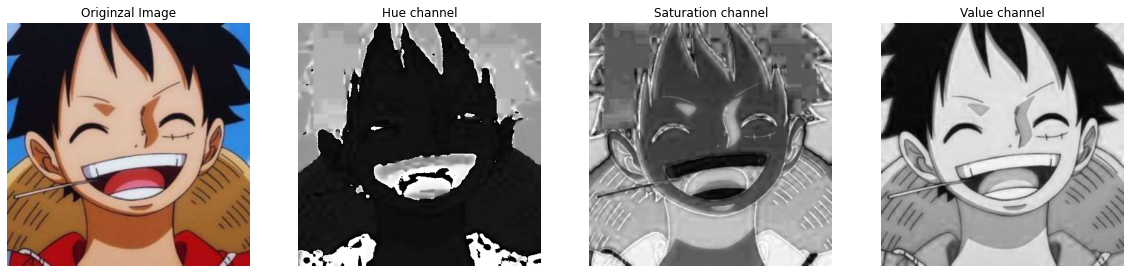

In [39]:
# same as RGB changgels but in this case we utulized hue, saturation, and value channels
img_hsv = cv2.cvtColor(image2,cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(img_hsv)

plt.figure(figsize=(20,16))
display_image(image2, "Originzal Image", "off")

plt.subplot(142)
plt.title("Hue channel")
plt.imshow(h, cmap='gray')
plt.axis("off")

plt.subplot(143)
plt.title("Saturation channel")
plt.imshow(s, cmap='gray')
plt.axis("off")

plt.subplot(144)
plt.title("Value channel")
plt.imshow(v, cmap='gray')
plt.axis("off")

plt.show()

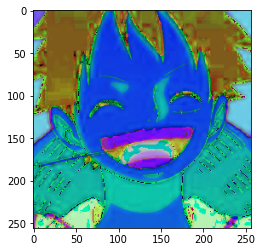

In [38]:
img_merge3 = cv2.merge([h,s,v]) # this will result in orignal color of the image
img_merge3 = cv2.merge([h+3,s+2,v+4]) # you can also perform operations to manipulate the outcome
plt.imshow(img_merge3)
plt.show()

# Gamma Correction

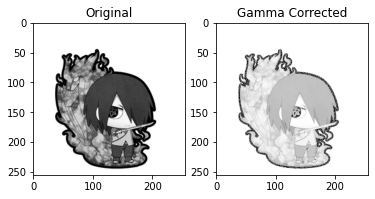

In [40]:
#@title Gamma Adjustment
gamma =  5#@param {type:"number"}
inv_gamma = 1.0/gamma
corrected_img = 255 * np.power(gray1/255,inv_gamma) # performs gamma correction
plt.subplot(121), plt.title('Original'), plt.imshow(gray1, cmap='gray')
plt.subplot(122), plt.title('Gamma Corrected'),plt.imshow(corrected_img, cmap='gray')
plt.show()

# RGB Histogram Equalization

In [13]:
plt_img = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
ch_rgb = cv2.split(plt_img)
colors = ("r", "g", "b")
equ_rgb= []
for channel in ch_rgb:
    equ_rgb.append(cv2.equalizeHist(channel))
hequ_rgb = cv2.merge(equ_rgb)

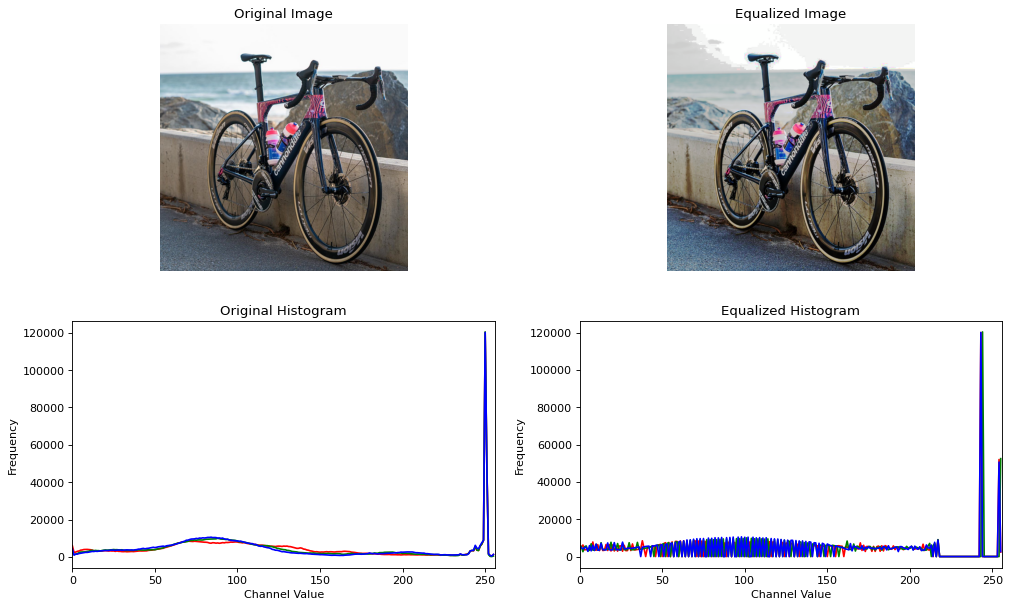

In [14]:
plt.figure(figsize=(15, 9), dpi=80) 
plt.subplot(221) 
plt.imshow(plt_img) 
plt.title("Original Image") 
plt.axis('off') 
plt.subplot(223) 
plt.title("Original Histogram") 
plt.xlabel("Channel Value") 
plt.ylabel("Frequency") 

for (channel, color) in zip(ch_rgb, colors): 
  hist = cv2.calcHist([channel], [0], None, [256], [0, 256]) 
  plt.plot(hist, color=color) 
  plt.xlim([0, 256])

plt.subplot(222) 
plt.imshow(hequ_rgb) 
plt.title("Equalized Image") 
plt.axis('off') 
plt.subplot(224) 
plt.title("Equalized Histogram") 
plt.xlabel("Channel Value") 
plt.ylabel("Frequency") 
for (equ_channel, color) in zip(equ_rgb, colors): 
  hist = cv2.calcHist([equ_channel], [0], None, [256], [0, 256]) 
  plt.plot(hist, color=color) 
  plt.xlim([0, 256]) 
plt.show()

# HSV Histogram Equalization

In [15]:
ch_hsv = cv2.split(plt_img)
ch_hsv_eq = ch_hsv[0], ch_hsv[1], cv2.equalizeHist(ch_hsv[2])
hequ_hsv = cv2.merge(ch_hsv_eq)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


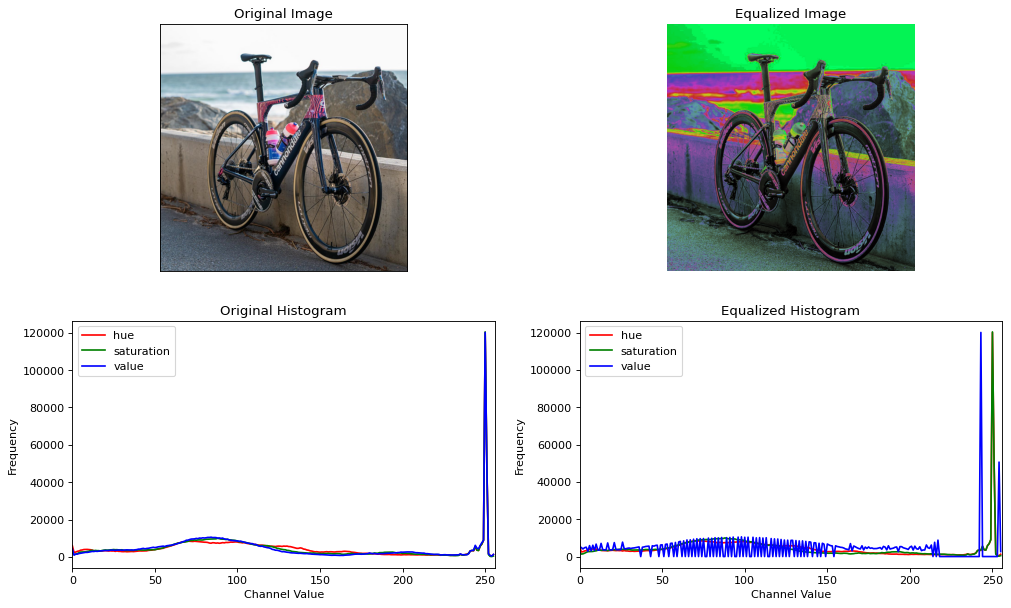

In [16]:
plt.figure(figsize=(15, 9), dpi=80) 
plt.subplot(221), plt.title('Original Image'), plt.xticks([]), plt.yticks([]), plt.imshow(plt_img)
plt.subplot(222), plt.title('HSV Histogram Equalization'), plt.xticks([]), plt.yticks([]), plt.imshow(cv2.cvtColor(hequ_hsv,cv2.COLOR_HSV2RGB))
plt.subplot(223) 
plt.title("Original Histogram") 
plt.xlabel("Channel Value") 
plt.ylabel("Frequency") 

labels = ("hue","saturation","value")
for (channel, color, label) in zip(ch_hsv, ('r','g','b'),labels): 
  hist = cv2.calcHist([channel], [0], None, [256], [0, 256]) 
  plt.plot(hist, color=color, label=label) 
  plt.xlim([0, 256])
plt.legend()
plt.subplot(222) 
plt.imshow(cv2.cvtColor(hequ_hsv,cv2.COLOR_HSV2RGB)) 
plt.title("Equalized Image") 
plt.axis('off') 
plt.subplot(224) 
plt.title("Equalized Histogram") 
plt.xlabel("Channel Value") 
plt.ylabel("Frequency") 
for (equ_channel, color, label) in zip(ch_hsv_eq, ('r','g','b'),labels): 
  hist = cv2.calcHist([equ_channel], [0], None, [256], [0, 256]) 
  plt.plot(hist, color=color, label=label) 
  plt.xlim([0, 256]) 
plt.legend()

plt.show()

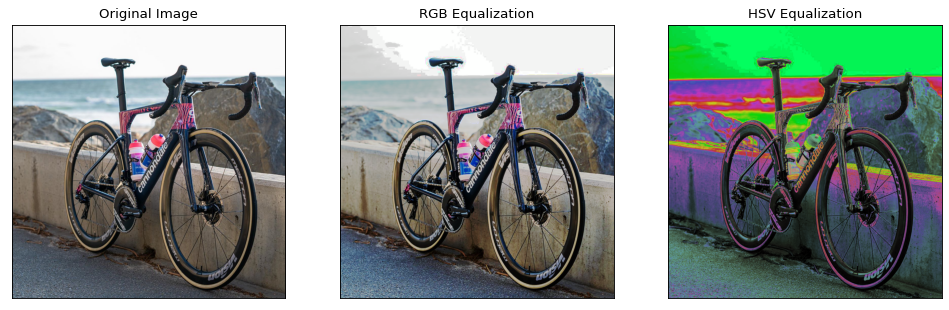

In [17]:
plt.figure(figsize=(15, 9), dpi=80) 
plt.subplot(131), plt.title('Original Image'), plt.xticks([]), plt.yticks([]), plt.imshow(plt_img)
plt.subplot(132), plt.title('RGB Equalization'), plt.xticks([]), plt.yticks([]), plt.imshow(hequ_rgb)
plt.subplot(133), plt.title('HSV Equalization'), plt.xticks([]), plt.yticks([]), plt.imshow(cv2.cvtColor(hequ_hsv,cv2.COLOR_HSV2RGB))
plt.show()

# Image Blending

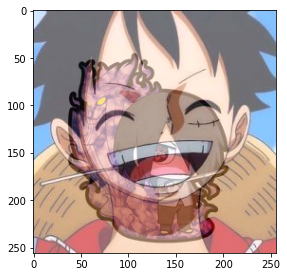

In [18]:
Blended = cv2.addWeighted(image1, 0.4, image2, 0.7, 0.0);
display_image(Blended) 

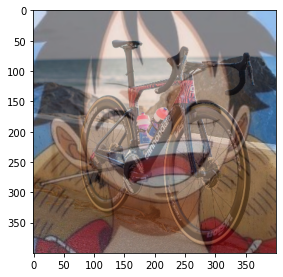

In [20]:
image2 = cv2.resize(image2, (400, 400))
image3 = cv2.resize(image3, (400, 400))
Blended = cv2.addWeighted(image3, 0.5, image2, 0.5, 0.0);
display_image(Blended) 